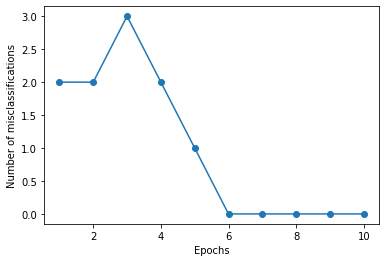

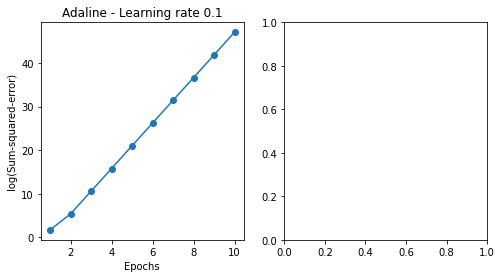

<ipython-input-32-f7e90572667c>:123: RuntimeWarning: overflow encountered in double_scalars
  cost = 0.5 * error**2
<ipython-input-32-f7e90572667c>:121: RuntimeWarning: invalid value encountered in add
  self.w_[1:] += self.eta * xi.dot(error)


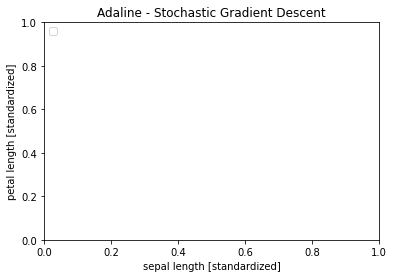

In [32]:
from numpy.matrixlib.defmatrix import N
'''
Calicia Perea
HW 2
Machine Learning 
February 8, 2023
'''

import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3


#Design and implement a Perceptron binary classifier.
class Perceptron(object):

  def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
  def fit(self, X,y):
    self.w_ = np.zeros(1+X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
        """Calculate net input ie. product"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Design and implement a Adaline binary classifier.
class Adaline(object):
  def __init__(self, eta=0.01, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter
  
  def fit(self, X,y):
    self.w_ = np.zeros(1+ X.shape[1])
    self.cost_=[]

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y- output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() /2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return self.net_input(X)

  def predict(self, X):
    return np.where(self.activation(X) >= 0.0, 1, -1)

# Design and implement a SGD binary classifier.
class SGD(object):
  def __init__(self, eta= 0.01, n_iter = 50,shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    if random_state:
      np.random.seed(random_state)

  def fit(self, X,y):
    self.w_=np.zeros(1+X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
        cost = []
        for xi, target in zip(X, y):
          cost.append(self._update_weights(xi, target))
          avg_cost = sum(cost) / len(y)
          self.cost_.append(avg_cost)
    return self



  def partial_fit(self, X, y):
    if not self.w_initialized:
        self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
        self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    r = np.random.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self, m):
    self.w_ = np.zeros(1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    output = self.net_input(xi)
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost

  def net_input(self, X):
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return self.net_input(X)

  def predict(self, X):
    return np.where(self.activation(X) >= 0.0, 1, -1)


# test different classifiers
  def train_model(self,X,y):
    if self.classifier_name == "perceptron":
      self.classifier = Perceptron()
    elif self.classifier_name == "adaline":
      self.classifier = Adaline()
    elif self.classifier_name == "sgd":
      self.classifier = SGD()
    else:
      sys.exit("Error invalid Classifier Name")
    self.classifier.fit(Perceptron.fit)
    y_pred = self.classifier.predict(Perceptron.predict)

  def report_results(self):
    print("Classifier:", self.classifier_name)
    print("Predict:", self.predict)
    

if __name__=='__main__':
  if len(sys.argv) != 3:
    sys.exit("Error: Incorrect number of arguments")
  classifier_name = sys.argv[1]
  data_file1 = sys.argv[2]

df = pd.read_csv('/content/drive/MyDrive/machineLanguage/Colab Notebooks/ML /hw2/iris.data.txt',header=None)

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

##Testing Perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()


##Testing Adaline
fig, a = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada = Adaline(eta=0.1, n_iter=10).fit(X,y)

a[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
a[0].set_xlabel('Epochs')
a[0].set_ylabel('log(Sum-squared-error)')
a[0].set_title('Adaline - Learning rate 0.1')
plt2.show()

##Testing SGD
sgd = SGD(eta=0.1, n_iter=10).fit(X,y)
plt3.title('Adaline - Stochastic Gradient Descent')
plt3.xlabel('sepal length [standardized]')
plt3.ylabel('petal length [standardized]')
plt3.legend(loc='upper left')
plt3.show()

